In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                      shear_range=0.2, 
                                        zoom_range=0.2,
                                        horizontal_flip=True)
x_train = train_datagen.flow_from_directory(
        'dataset/train',
        target_size = (32,32),
        color_mode="grayscale",
        batch_size=4,
        class_mode='binary'
        )

Found 60 images belonging to 2 classes.


In [6]:
test_datagen = ImageDataGenerator(rescale=1./255)
x_test = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(32,32),
        batch_size=4,
        color_mode="grayscale",
        class_mode='binary')

Found 60 images belonging to 2 classes.


In [7]:
nets = 20
model = [0] *nets
for j in range(nets):
    model[j] = Sequential()
    model[j].add(Conv2D(32, kernel_size = 3, activation='elu', input_shape = (32,32,1)))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(32, kernel_size = 3, activation='elu'))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='elu'))
    model[j].add(BatchNormalization())
    model[j].add(Dropout(0.4))

    #Second Layer of CNN
    model[j].add(Conv2D(64, kernel_size = 3, activation='elu'))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(64, kernel_size = 3, activation='elu'))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='elu'))
    model[j].add(BatchNormalization())
    model[j].add(Dropout(0.4))

    #Third layer of CNN
    model[j].add(Conv2D(128, kernel_size = 4, activation='elu'))
    model[j].add(BatchNormalization())
    model[j].add(Flatten())
    model[j].add(Dropout(0.4))

    #Output layer
    model[j].add(Dense(1, activation='sigmoid'))

    # Compile each model
    model[j].compile(optimizer='adam', loss="binary_crossentropy", metrics=["accuracy"])

In [8]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=0, factor=0.5, min_lr=0.00001)

In [9]:
history = [0] * nets
epochs = 35

In [10]:
for j in range(nets):
    print(f'Individual Net : {j+1}')   
    history[j] = model[j].fit(x_train, epochs = epochs, steps_per_epoch = 7, validation_data = x_test, callbacks=[learning_rate_reduction], verbose=0)

    print("CNN Model {0:d}: Epochs={1:d}, accuracy={2:.5f}, Validation accuracy={3:.5f}".format(j+1,epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))    

Individual Net : 1
CNN Model 1: Epochs=35, accuracy=0.92857, Validation accuracy=0.53333
Individual Net : 2
CNN Model 2: Epochs=35, accuracy=0.92857, Validation accuracy=0.60000
Individual Net : 3
CNN Model 3: Epochs=35, accuracy=0.92857, Validation accuracy=0.60000
Individual Net : 4
CNN Model 4: Epochs=35, accuracy=0.92857, Validation accuracy=0.50000
Individual Net : 5
CNN Model 5: Epochs=35, accuracy=0.89286, Validation accuracy=0.56667
Individual Net : 6
CNN Model 6: Epochs=35, accuracy=0.89286, Validation accuracy=0.50000
Individual Net : 7
CNN Model 7: Epochs=35, accuracy=0.92857, Validation accuracy=0.50000
Individual Net : 8
CNN Model 8: Epochs=35, accuracy=0.92857, Validation accuracy=0.51667
Individual Net : 9
CNN Model 9: Epochs=35, accuracy=0.89286, Validation accuracy=0.50000
Individual Net : 10
CNN Model 10: Epochs=35, accuracy=0.96429, Validation accuracy=0.51667
Individual Net : 11
CNN Model 11: Epochs=35, accuracy=0.85714, Validation accuracy=0.51667
Individual Net : 

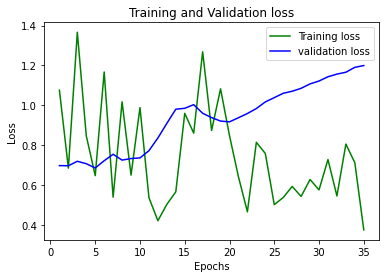

In [11]:
for j in range(nets):
    loss_train = history[j].history['loss']
    loss_val = history[j].history['val_loss']
epochs = range(1,36)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

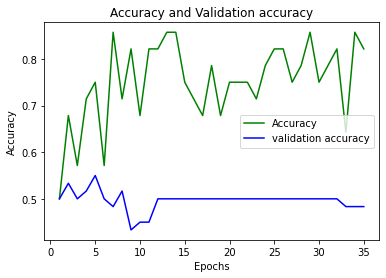

In [13]:
for j in range(nets):
    loss_train = history[j].history['accuracy']
    loss_val = history[j].history['val_accuracy']
epochs = range(1,36)
plt.plot(epochs, loss_train, 'g', label='Accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Accuracy and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()